<a href="https://colab.research.google.com/github/Garvit-Kr/Deep_L/blob/main/deep_maths_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import scipy.stats as stats            #for t-test

import sympy as sym                    #symbolic maths in py   #not used many times
import sympy.plotting.plot as symplot

from IPython.display import display      #to display math eq

MATRIX MULTIPLICATION

In [ ]:
#USING NUMPY

# create some random matrices
A = np.random.randn(3,4)
B = np.random.randn(4,5)
C = np.random.randn(3,7)

# try some multiplications...
print(np.round( A@B   ,2)), print(' ')
# print(np.round( A@C   ,2)), print(' ')
# print(np.round( B@C   ,2)), print(' ')
print(np.round( C.T@A ,2))

#USING PYTORCH

# create some random matrices
A1  = torch.randn(3,4)
B1  = torch.randn(4,5)
C1 = np.random.randn(4,7)
C2 = torch.tensor( C1,dtype=torch.float )

# try some multiplications...
# print(np.round( A1@B1   ,2)), print(' ')
# print(np.round( A1@B1.T ,2)), print(' ')
print(np.round( A1@C1  ,2)), print(' ')
print(np.round( A1@C2  ,2))

[[-1.1   1.63  4.02 -1.94 -4.09]
 [ 0.99 -1.02  1.05 -1.21  0.08]
 [ 1.72 -0.75  5.07 -4.22 -2.97]]
 
[[-3.22  4.44 -1.35 -1.41]
 [-4.09  2.48  0.07  1.  ]
 [ 2.53 -2.44  0.81  0.2 ]
 [ 1.72 -0.34 -0.06 -1.03]
 [ 0.71 -0.45  0.12 -0.15]
 [ 0.13 -0.99  0.53  0.78]
 [ 4.59 -1.87 -0.38 -1.93]]
tensor([[ 2.5500,  0.0100,  1.0200,  1.3500, -0.6500,  1.5000,  1.0300],
        [-2.9600, -2.7900, -3.1500, -5.1100,  5.4500,  2.6800, -5.2200],
        [-2.3300,  0.1600, -1.6500, -2.0600,  2.7700,  0.3600, -0.6800]],
       dtype=torch.float64)
 
tensor([[ 2.5500,  0.0100,  1.0200,  1.3500, -0.6500,  1.5000,  1.0300],
        [-2.9600, -2.7900, -3.1500, -5.1100,  5.4500,  2.6800, -5.2200],
        [-2.3300,  0.1600, -1.6500, -2.0600,  2.7700,  0.3600, -0.6800]])


SOFTMAX FUNCTION    #gives probablity like output but not real probablity

[0.09003057 0.24472847 0.66524096]
1.0

[-5  3  8 -1  6 -3 10 -1  0  3 -4 10  7 10 -3 -1 -1  6  5  4 13 -5 -2  5
  2]


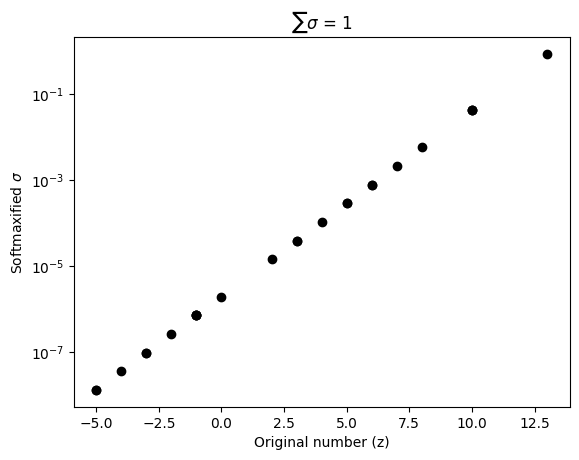

In [ ]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))
print()
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

SOFTMAX FUNCTION

using TORCH

tensor([1.3114e-08, 3.9094e-05, 5.8020e-03, 7.1603e-07, 7.8522e-04, 9.6904e-08,
        4.2871e-02, 7.1603e-07, 1.9464e-06, 3.9094e-05, 3.5649e-08, 4.2871e-02,
        2.1344e-03, 4.2871e-02, 9.6904e-08, 7.1603e-07, 7.1603e-07, 7.8522e-04,
        2.8887e-04, 1.0627e-04, 8.6110e-01, 1.3114e-08, 2.6341e-07, 2.8887e-04,
        1.4382e-05])


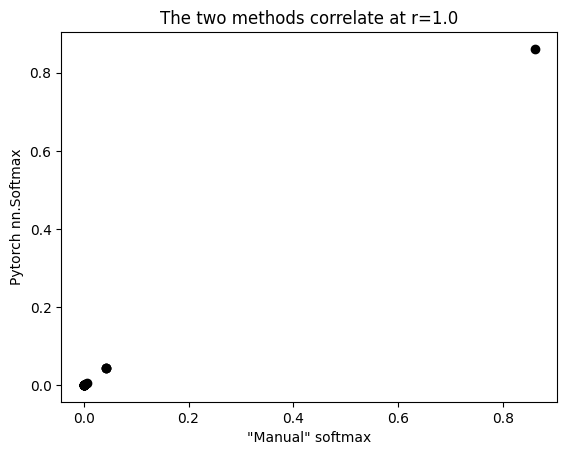

In [ ]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()

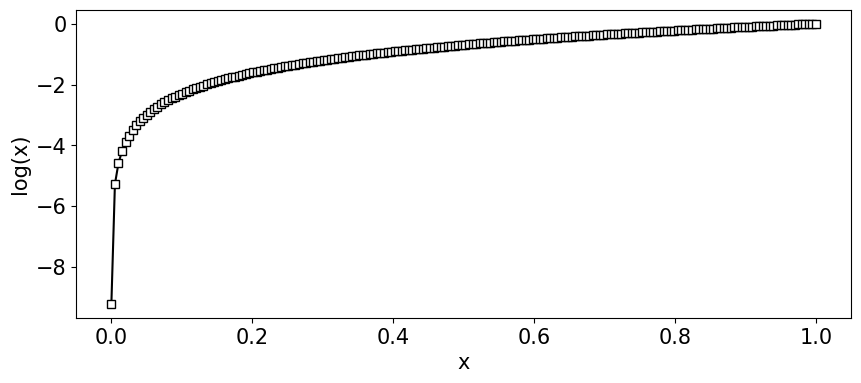

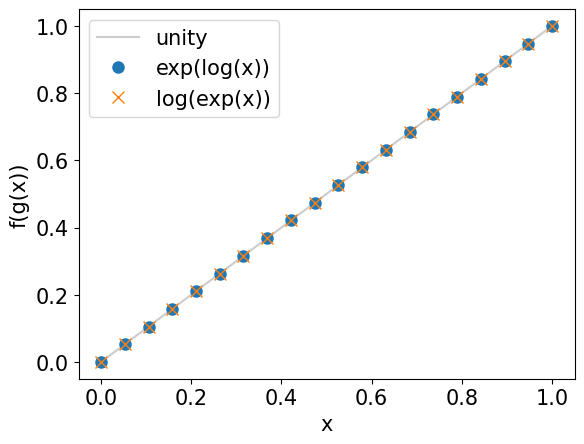

In [ ]:
# define a set of points to evaluate
x = np.linspace(.0001,1,200)

# compute their log
logx = np.log(x)



# plot!
fig = plt.figure(figsize=(10,4))

# increase font size. FYI
plt.rcParams.update({'font.size':15})

plt.plot(x,logx,'ks-',markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

# demonstration that log and exp are inverses

# redefine with fewer points
x = np.linspace(.0001,1,20)

# log and exp
logx = np.log(x)
expx = np.exp(x)

# the plot
plt.plot(x,x,color=[.8,.8,.8])
plt.plot(x,np.exp(logx),'o',markersize=8)
plt.plot(x,np.log(expx),'x',markersize=8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity','exp(log(x))','log(exp(x))'])
plt.show()

LOGARITHMIC FUNCTION

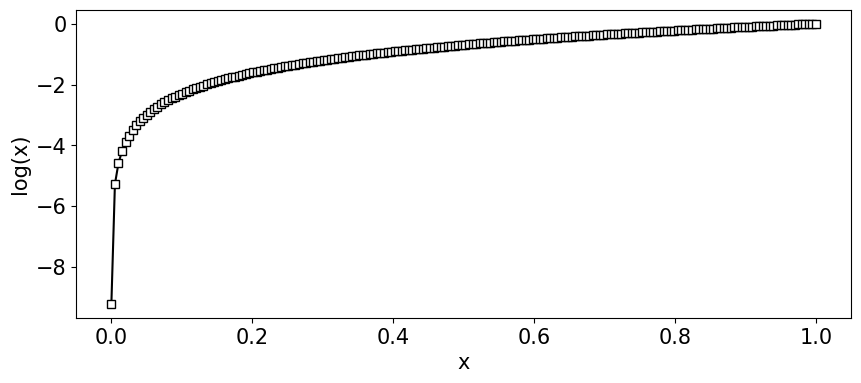

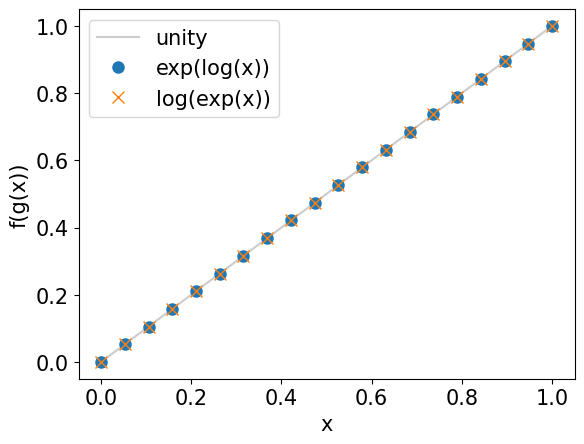

In [ ]:
# define a set of points to evaluate
x = np.linspace(.0001,1,200)

# compute their log
logx = np.log(x)



# plot!
fig = plt.figure(figsize=(10,4))

# increase font size. FYI
plt.rcParams.update({'font.size':15})

plt.plot(x,logx,'ks-',markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

# demonstration that log and exp are inverses

# redefine with fewer points
x = np.linspace(.0001,1,20)

# log and exp
logx = np.log(x)
expx = np.exp(x)

# the plot
plt.plot(x,x,color=[.8,.8,.8])
plt.plot(x,np.exp(logx),'o',markersize=8)
plt.plot(x,np.log(expx),'x',markersize=8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity','exp(log(x))','log(exp(x))'])
plt.show()


# Reminder of entropy:

$$H(p) = -\sum_x p(x)\log(p(x))$$

In [ ]:
# probability of an event happening
p = .25

# NOT the correct formula!
H = -( p*np.log(p) )
print('Wrong entropy: ' + str(H))

# the correct way to compute entropy
x = [.25,.75]

H = 0
for p in x:
  H -= p*np.log(p)

print('Correct entropy: ' + str(H))

# also correct, written out for N=2 events
H = -( p*np.log(p) + (1-p)*np.log(1-p) )
print('Correct entropy: ' + str(H))

Wrong entropy: 0.34657359027997264
Correct entropy: 0.5623351446188083
Correct entropy: 0.5623351446188083


CROSS ENTROPY

In [ ]:
# note: all probs must sum to 1!
p = [   1,0   ] # sum=1
q = [ .25,.75 ] # sum=1

H = 0
for i in range(len(p)):
  H -= p[i]*np.log(q[i])

print('Cross entropy: ' + str(H))

# also correct, written out for N=2 events
H = -( p[0]*np.log(q[0]) + p[1]*np.log(q[1]) )
print('Correct entropy: ' + str(H))

# simplification
H = -np.log(q[0])
print('Manually simplified: ' + str(H))

''' now using pytorch'''
import torch
import torch.nn.functional as F

# note: inputs must be Tensors
q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

F.binary_cross_entropy(p_tensor,q_tensor)

Cross entropy: 1.3862943611198906
Correct entropy: 1.3862943611198906
Manually simplified: 1.3862943611198906


tensor(75.)

ARGMIN / ARGMAX(TELLS ORG. LOC. OF...)

In [ ]:
'''BY NUMPY'''

# create a vector
v = np.array([ 1,40,2,-3 ])

# find and report the maximum and minimum values
minval = np.min(v)
maxval = np.max(v)

print('Min,max: %g,%g' %(minval,maxval) )


# now for the argmin/max
minidx = np.argmin(v)
maxidx = np.argmax(v)

print('Min,max indices: %g,%g' %(minidx,maxidx) ), print(' ')

# confirm
print(f'Min val is { v[minidx] }, max val is { v[maxidx] }')

# repeat with matrix
M = np.array([ [0,1,10], [20,8,5] ])
print(M), print(' ')

# various minima in this matrix!
minvals1 = np.min(M)        # minimum from ENTIRE matrix
minvals2 = np.min(M,axis=0) # minimum of each column (across rows)
minvals3 = np.min(M,axis=1) # minimum of each row (across columns)

# print them out
print(minvals1)
print(minvals2)
print(minvals3)

# various minima in this matrix!
minidx1 = np.argmin(M)        # minimum from ENTIRE matrix
minidx2 = np.argmin(M,axis=0) # minimum of each column (across rows)
minidx3 = np.argmin(M,axis=1) # minimum of each row (across columns)

# print them out
print(M), print(' ') # reminder
print(minidx1)
print(minidx2)
print(minidx3)


'''BY USING PYTORCH'''

# create a vector
v = torch.tensor([ 1,40,2,-3 ])

# find and report the maximum and minimum values
minval = torch.min(v)
maxval = torch.max(v)

print('Min,max: %g,%g' %(minval,maxval) )


# now for the argmin/max
minidx = torch.argmin(v)
maxidx = torch.argmax(v)

print('Min,max indices: %g,%g' %(minidx,maxidx) ), print(' ')

# confirm
print(f'Min val is { v[minidx] }, max val is { v[maxidx] }')

# repeat with matrix
M = torch.tensor([ [0,1,10], [20,8,5] ])
print(M), print(' ')

# various minima in this matrix!
min1 = torch.min(M)        # minimum from ENTIRE matrix
min2 = torch.min(M,axis=0) # minimum of each column (across rows)
min3 = torch.min(M,axis=1) # minimum of each row (across columns)

# print them out
print(min1), print(' ')
print(min2), print(' ')
print(min2.values)
print(min2.indices)

min2.count

Min,max: -3,40
Min,max indices: 3,1
 
Min val is -3, max val is 40
[[ 0  1 10]
 [20  8  5]]
 
0
[0 1 5]
[0 5]
[[ 0  1 10]
 [20  8  5]]
 
0
[0 0 1]
[0 2]
Min,max: -3,40
Min,max indices: 3,1
 
Min val is -3, max val is 40
tensor([[ 0,  1, 10],
        [20,  8,  5]])
 
tensor(0)
 
torch.return_types.min(
values=tensor([0, 1, 5]),
indices=tensor([0, 0, 1]))
 
tensor([0, 1, 5])
tensor([0, 0, 1])


<function min.count(value, /)>

Mean and Variance

In [ ]:
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0]
n = len(x)

# compute the mean
mean1 = np.mean(x)
mean2 = np.sum(x) / n

# print them
print(mean1)
print(mean2)
#-------------------------
# variance

var1 = np.var(x)
var2 = (1/(n-1)) * np.sum( (x-mean1)**2 )

print(var1)
print(var2)
#--------------------------
# uh oh!

var3 = np.var(x,ddof=1)

print(var3)
print(var2)

#------------------------
# does it matter for large N?    -->because the diff will go smaller with big dataset

N = 10000
x = np.random.randint(0,high=20,size=N)

var0 = np.var(x,ddof=0) # default
var1 = np.var(x,ddof=1) # unbiased

print(var0)
print(var1)


3.142857142857143
3.142857142857143
4.122448979591836
4.809523809523809
4.809523809523809
4.809523809523809
33.642854240000005
33.64621886188619


Random Sampling and Sampling Variablity

1.625
4.6


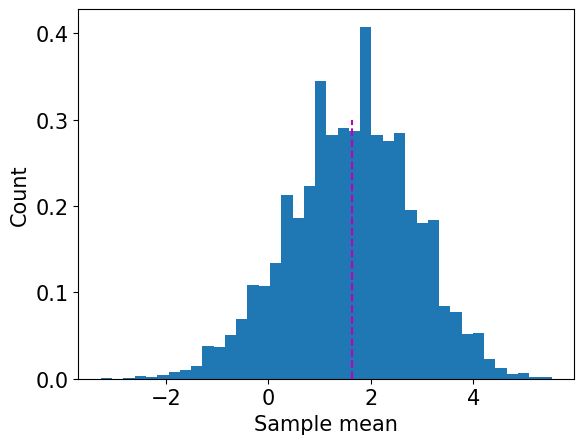

In [ ]:
# create a list of numbers to compute the mean and variance of
x = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
n = len(x)

# compute the population mean
popmean = np.mean(x)

# compute a sample mean
sample = np.random.choice(x,size=5,replace=True)
sampmean = np.mean(sample)

# print them
print(popmean)
print(sampmean)

#------------------------------------------------------------
# compute lots of sample means

# number of experiments to run
nExpers = 10000

# run the experiment!
sampleMeans = np.zeros(nExpers)
for i in range(nExpers):

  # step 1: draw a sample
  sample = np.random.choice(x,size=15,replace=True)  #changing size of sample will give better results

  # step 2: compute its mean
  sampleMeans[i] = np.mean(sample)



# show the results as a histogram
plt.hist(sampleMeans,bins=40,density=True)
plt.plot([popmean,popmean],[0,.3],'m--')
plt.ylabel('Count')
plt.xlabel('Sample mean')
plt.show()

Random With Seeding

In [ ]:
# generate a few random numbers
np.random.randn(5)

#---------------------------------------
# repeat after fixing the seed (old-but-still-widely-used method)
np.random.seed(17)
print(np.random.randn(5))
print(np.random.randn(5))

#----------------------------------------
#another type of seeding
randseed1 = np.random.RandomState(17)
randseed2 = np.random.RandomState(20210530)

print( randseed1.randn(5) ) # same sequence
print( randseed2.randn(5) ) # different from above, but same each time
print( randseed1.randn(5) ) # same as two up
print( randseed2.randn(5) ) # same as two up
print( np.random.randn(5) ) # different every time

#-------------------------------------------
torch.randn(5)

#-------------------------------------------
torch.manual_seed(17)
print( torch.randn(5) )

# torch's seed doesn't spread to numpy
print( np.random.randn(5) )

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
[ 2.171257    1.15231025 -1.81881234 -0.13804934  0.53983961]
tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
[-1.77528229  1.31487654 -0.47344805 -1.0922299  -0.25002744]


T Test     (to check weather one model is better than another)(diff of mean/standard devaiation)

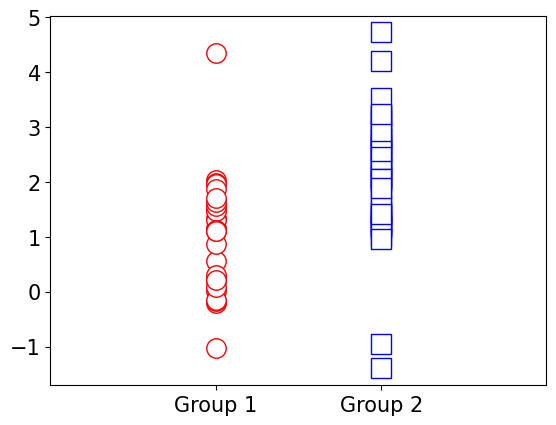

-3.9795870896140824
0.0001701882699200114


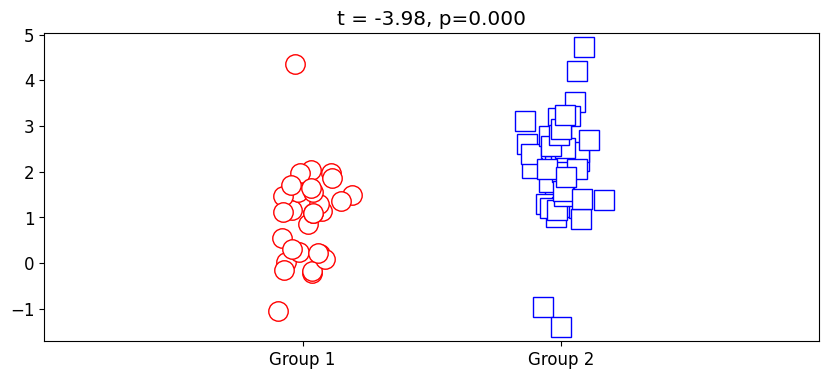

In [ ]:
# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 2   # population mean in dataset 2

# generate the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)



# plot them
plt.plot(np.zeros(n1),data1,'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2), data2,'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()

#-------------------------------------------------------------
# t-test via stats package

# _ind = independent samples(other's depend on nature of data)
t,p = stats.ttest_ind(data1,data2)
print(t)
print(p)   #should be less than .05    #and tells it has larger mean

#------------------------------------------------------------
# common way to show t-test results in a plot
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12}) # change the font size

plt.plot(0+np.random.randn(n1)/15, data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])

# set the title to include the t-value and p-value
plt.title(f't = {t:.2f}, p={p:.3f}')

plt.show()

Derivaties

In [ ]:
''' in D_L ,the goal (eg. classification) is represented as an error fn. .Thus ,the solution is to point with the smallest error.
the DERIVATIVE tell us to 'move' which way in that error landscape in order to find optimal sol. .   '''

2*x**2
4*x


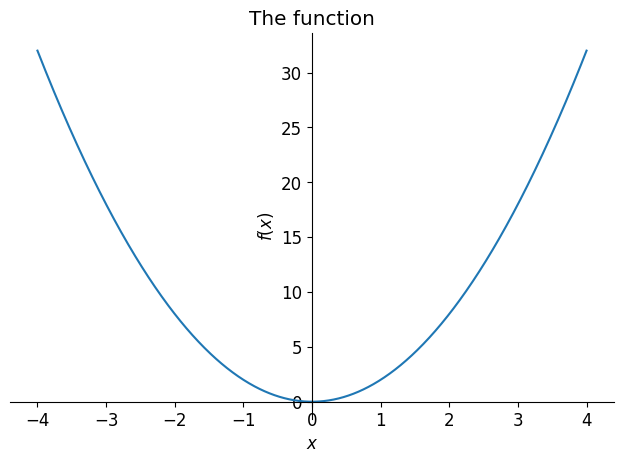

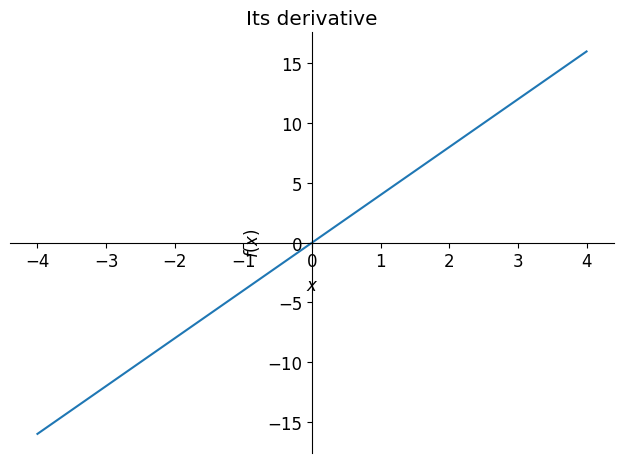

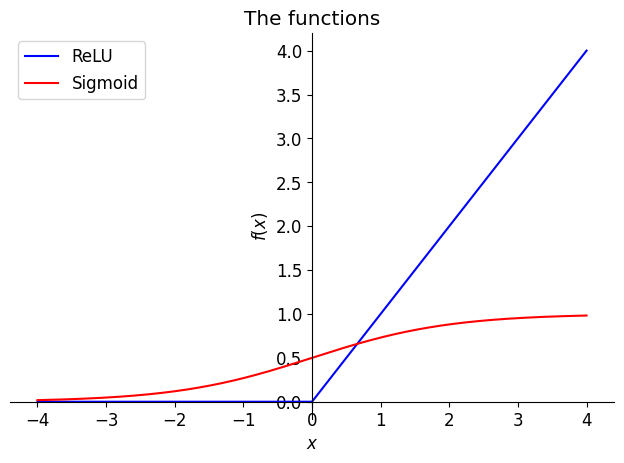

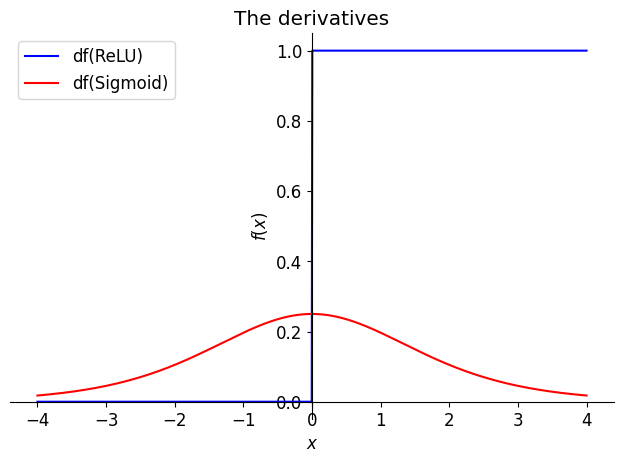

In [ ]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create a function
fx = 2*x**2

# compute its derivative
df = sym.diff(fx,x)

# print them
print(fx)
print(df)

#--------------------------------------
# plot them
symplot(fx,(x,-4,4),title='The function')
plt.show()

symplot(df,(x,-4,4),title='Its derivative')
plt.show()

#---------------------------------------
# repeat with relu and sigmoid

# create symbolic functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# graph the functions
p = symplot(relu,(x,-4,4),label='ReLU',show=False,line_color='blue')
p.extend( symplot(sigmoid,(x,-4,4),label='Sigmoid',show=False,line_color='red') )
p.legend = True
p.title = 'The functions'
p.show()


# graph their derivatives
p = symplot(sym.diff(relu),(x,-4,4),label='df(ReLU)',show=False,line_color='blue')
p.extend( symplot(sym.diff(sigmoid),(x,-4,4),label='df(Sigmoid)',show=False,line_color='red') )
p.legend = True
p.title = 'The derivatives'
p.show()

In [ ]:
'''
f(x)....df/dx(derivative)....and put derivative equal to 0

minima when df<0 to left & df > 0 to right
vice versa for maxima

constant when df = 0 (VANISHING GRADIENT)(where it is not maxima or minima but const. in graph)
________________________________________________________________________
means derivative
(f + g) ' == f ' + g '
(f x g) ' = f ' x g + f x g '                  (product rule)
df/dx  f(g(x))= f '(g(x))g '(x)            (chain rule)

________________________________________________________________________
from IPython.display import display      and np & sym    (display : eq clearly )

fx , gx = ....
df= sym.diff(df)
dg= sym.diff(gx)
manual = df * gx + fx * dg         (same answer)
viasympy=sym.diff( fx * gx)       (same answer)
then use display instead of print only eqations
'''

In [ ]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create two functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

# compute their individual derivatives
df = sym.diff(fx)
dg = sym.diff(gx)

# apply the product rule "manually"
manual = df*gx + fx*dg
thewrongway = df*dg

# via sympy
viasympy = sym.diff( fx*gx )


# print everything
print('The functions:')
display(fx)
display(gx)
print(' ')

print('Their derivatives:')
display(df)
display(dg)
print(' ')

print('Manual product rule:')
display(manual)
print(' ')

print('Via sympy:')
display(viasympy)
print(' ')


print('The wrong way:')
display(thewrongway)

#------------------------------------------------
# repeat with chain rule
gx = x**2 + 4*x**3
fx = ( gx )**5

print('The function:')
display(fx)
print(' ')

print('Its derivative:')
display(sym.diff(fx))

The functions:


2*x**2

-3*x**4 + 4*x**3

 
Their derivatives:


4*x

-12*x**3 + 12*x**2

 
Manual product rule:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
Via sympy:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
The wrong way:


4*x*(-12*x**3 + 12*x**2)

The function:


(4*x**3 + x**2)**5

 
Its derivative:


(60*x**2 + 10*x)*(4*x**3 + x**2)**4